In [177]:
import csv
from urllib.request import urlopen
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import ssl
import re
import numpy as np

In [3]:
# asi evitamos el error: URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)>
def main():
    ssl._create_default_https_context = ssl._create_unverified_context
    r = urllib.request.urlopen('https://bit.ly/3jpMFRW')
    print(r.status)
    print(r)


if __name__ == '__main__':
    main()

200


In [105]:
html = urlopen("https://bit.ly/3jpMFRW")
soup = BeautifulSoup(html, "html.parser")
# table = soup.findAll("table", {"class":"wikitable"})[0]
# rows = table.findAll("tr")

In [148]:
with open("Dataset.csv", "wt+", newline="") as f:
    writer = csv.writer(f)
    for i in rows:
        row = []
        for cell in i.findAll(["td", "th"]):
            row.append(cell.get_text())
        writer.writerow(row)

data = pd.read_csv("Dataset.csv", encoding='latin-1')#, thousands=',')
data= data[['Location\n', 'Cases\n', 'Deaths\n']]
data.head()

,Location\n,Cases\n,Deaths\n
0,World[a]\n,"561,978,603\n","6,368,794\n"
1,European Union[b]\n,"154,893,179\n","1,110,365\n"
2,United States\n,"89,521,016\n","1,023,788\n"
3,India\n,"43,750,599\n","525,709\n"
4,Brazil\n,"33,290,266\n","675,295\n"


In [149]:
data = data.rename(columns={'Location\n': 'Location', 'Cases\n': 'Cases', 'Deaths\n':'Deaths'}).dropna()
data=data.drop([209,213,216])
data

,Location,Cases,Deaths
0,World[a]\n,"561,978,603\n","6,368,794\n"
1,European Union[b]\n,"154,893,179\n","1,110,365\n"
2,United States\n,"89,521,016\n","1,023,788\n"
3,India\n,"43,750,599\n","525,709\n"
4,Brazil\n,"33,290,266\n","675,295\n"
...,...,...,...
211,Macau\n,727\n,5\n
212,Wallis and Futuna\n,456\n,7\n
214,Federated States of Micronesia\n,38\n,0\n
215,Vatican City\n,29\n,0\n


In [188]:
columns = ['Location', 'Cases', 'Deaths']

for column in columns:
    data[column]=data[column].apply(lambda x: re.sub(r'\n', '', str(x)))


data['Cases']=data['Cases'].apply(lambda x: str(x).replace(',','')).astype('int')
data['Deaths']=data['Deaths'].apply(lambda x: str(x).replace(',','')).astype('int')

data=data[2:]

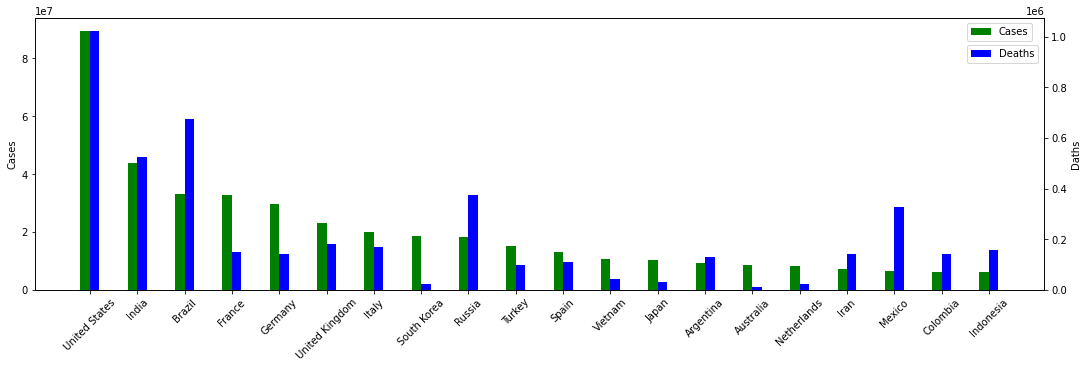

In [201]:
fig, ax1 = plt.subplots( figsize=(15,5), sharex=True, constrained_layout=True)

ax2=ax1.twinx()
width=0.2
countries= 20
index=np.arange(countries)

ax1.bar(index, data['Cases'][:countries], width, color='green', label='Cases')
ax2.bar(index+width, data['Deaths'][:countries], width,  color='blue', label='Deaths')

ax1.set_ylabel('Cases')
ax2.set_ylabel('Daths')

ax1.legend(bbox_to_anchor=(0.993, 1))
ax2.legend(bbox_to_anchor=(0.999, 0.92))

plt.xticks(index+width/2, data['Location'][:countries])
ax1.tick_params(axis='x', labelrotation = 45)

plt.show()